In [1]:
%matplotlib inline
from CartPole import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from sklearn import linear_model

 Please note a crashed notebook meant I lost a lot of Task 3 code, and had to revert back to an outdated notebook [this one]. The plots were created before this occured, therefore I have not bothered to recover this notebooks functionality.

# Task 3

In [2]:
plot_path = 'plots/Task3/'
index_to_variable = {0 : 'cart_location', 1 : 'cart_velocity', 2 : 'pole_angle', 3 : 'pole_velocity', 4 : 'action'}
index_pair_list = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3],[0,4],[1,4],[2,4],[3,4]]
no_samples = 20
x_range_for_index = {0 : np.linspace(-5,5,no_samples), 1 : np.linspace(-10,10,no_samples), 
                     2 : np.linspace(-np.pi,np.pi,no_samples), 3 : np.linspace(-15,15,no_samples), 
                     4 : np.linspace(-20,20,no_samples)}

n = 2000
no_RBC = 320 
lam = 0.00001
train_proportion = 0.8
x_train, y_train, x_test, y_test = generate_data(n)
    
sigma = np.std(x_train, axis=0)

alpha, X_i_vals = train_alpha(x_train, y_train, no_RBC, sigma, n, train_proportion)
predictions = predict(x_test, alpha, X_i_vals, sigma)

C:\Users\Jordan\Anaconda3\lib\site-packages\autograd\tracer.py:48: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return f_raw(*args, **kwargs)


## Task 3.1
### Introduce noise to observed variables

In [3]:
samples = 1
np.round((add_noise(x_train[:samples],0.1)-x_train[:samples]),2)

array([[-0.13,  0.01, -0.07, -0.14,  0.12]])

In [4]:
RMSE = None
var_range = [0.5**i for i in range(-2,5)]
for var_ in var_range:
    x_train_n = add_noise(x_train,var=var_)
    x_test_n = add_noise(x_test,var=var_)
    sigma_n = np.std(x_train_n, axis=0)
    alpha_n, X_i_vals_n = train_alpha(x_train_n, y_train, no_RBC, sigma_n, n, train_proportion)
    predictions_n = predict(x_test_n, alpha_n, X_i_vals_n, sigma_n)
    
    RMSE_ = np.array(display_RMSE(predictions_n, y_test))
        
    try:
        RMSE = np.vstack((RMSE, RMSE_))
    except:
        RMSE = RMSE_

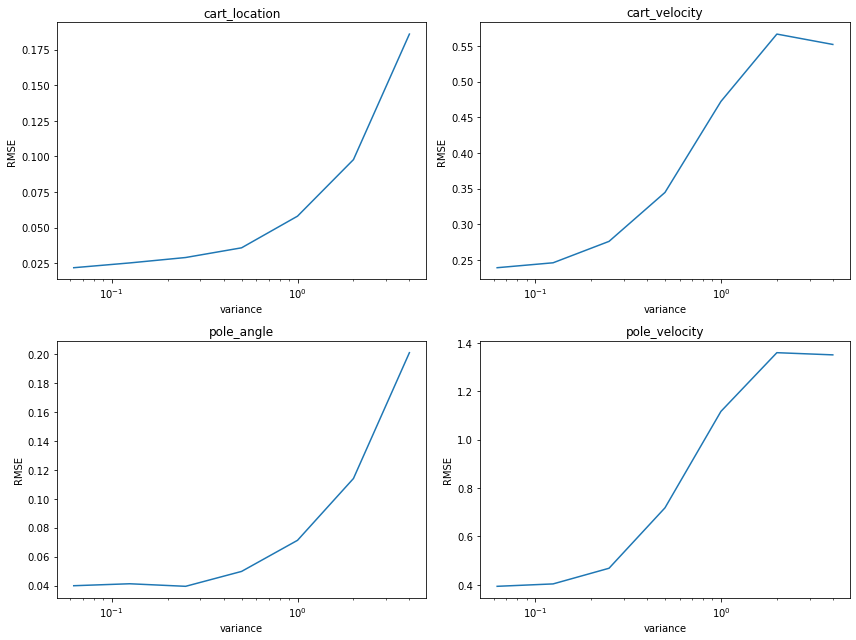

In [5]:
fig,axs = plt.subplots(2,2,figsize=(12,9))
       
for j in range(4):
    axs[int(round((j+1)/4,0)),j%2].plot(var_range, RMSE[:,j])
    axs[int(round((j+1)/4,0)),j%2].set_title(index_to_variable[j])
    axs[int(round((j+1)/4,0)),j%2].set_xlabel('variance')
    axs[int(round((j+1)/4,0)),j%2].set_ylabel('RMSE')
    axs[int(round((j+1)/4,0)),j%2].set_xscale('log')

fig.tight_layout()
# plt.savefig(plot_path + 'RMSE_different_noise_levels')

C:\Users\Jordan\Anaconda3\lib\site-packages\autograd\tracer.py:48: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return f_raw(*args, **kwargs)


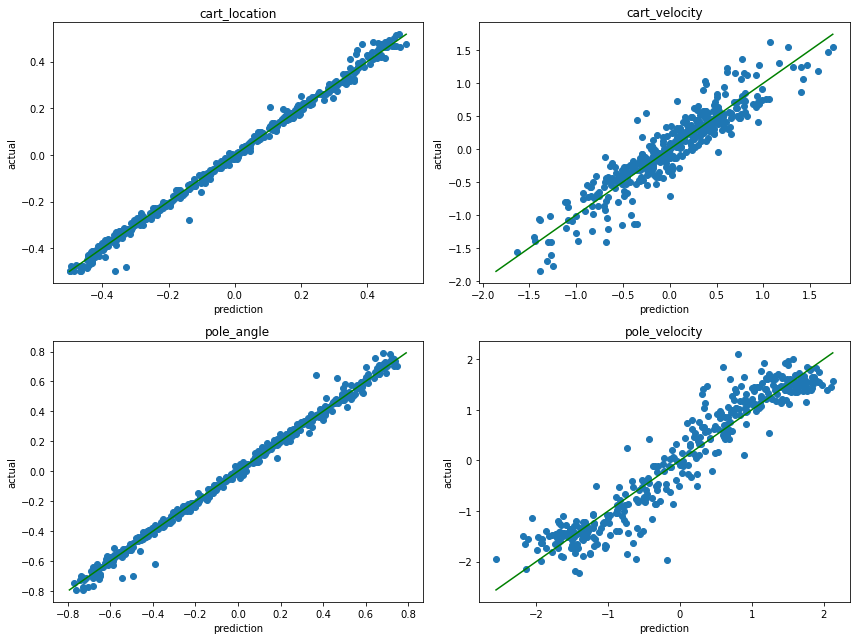

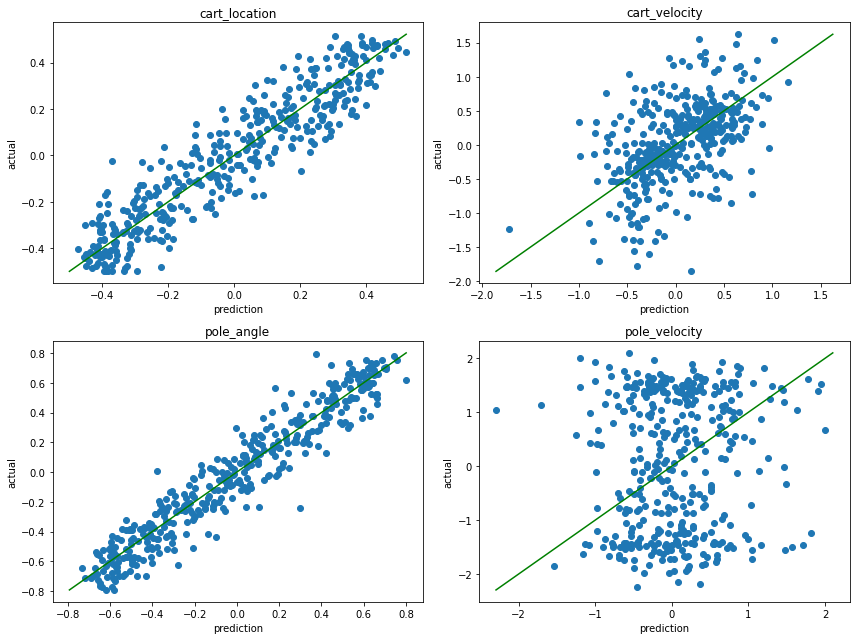

In [6]:
x_train_n = add_noise(x_train,var=2)
x_test_n = add_noise(x_test,var=2)
sigma_n = np.std(x_train_n, axis=0)
alpha_n, X_i_vals_n = train_alpha(x_train_n, y_train, no_RBC, sigma_n, n, train_proportion)
predictions_n = predict(x_test_n, alpha_n, X_i_vals_n, sigma_n)

plot_predictions_vs_actual(predictions, y_test, index_to_variable)
plt.show()
plot_predictions_vs_actual(predictions_n, y_test, index_to_variable)
# plt.savefig(plot_path + 'predictions_of_noisy_data')
plt.show()

Clearly the noisy data predictions are less effective

### Linear model perfomance with noisy x

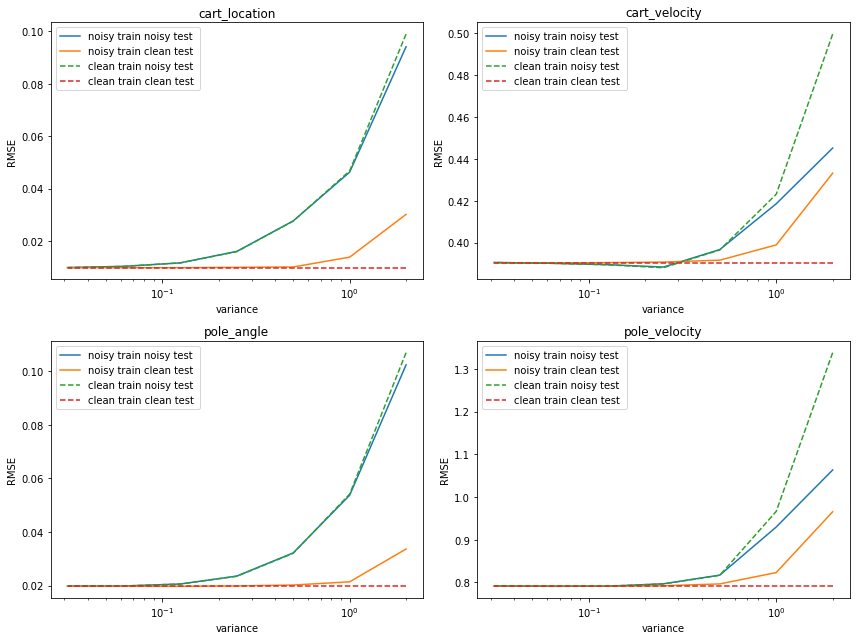

In [7]:
RMSE_noisy_train_noisy = None
RMSE_clean_train_noisy = None
RMSE_noisy_train_clean = None
RMSE_clean_train_clean = None

var_range = [0.5**i for i in range(-1,6)]
for var_ in var_range:
    reg_n = linear_model.LinearRegression()
    reg_c = linear_model.LinearRegression()

    x_train_n = add_noise(x_train,var=var_)
    x_test_n = add_noise(x_test,var=var_)
    
    reg_n.fit(x_train_n, y_train)
    reg_c.fit(x_train, y_train)
    
    predictions_n_train_n = reg_n.predict(x_test_n)
    predictions_c_train_n = reg_n.predict(x_test)
    predictions_n_train_c = reg_c.predict(x_test_n)
    predictions_c_train_c = reg_c.predict(x_test)

    RMSE_n_train_n = np.array(display_RMSE(predictions_n_train_n, y_test))
    RMSE_c_train_n = np.array(display_RMSE(predictions_c_train_n, y_test))
    RMSE_n_train_c = np.array(display_RMSE(predictions_n_train_c, y_test))
    RMSE_c_train_c = np.array(display_RMSE(predictions_c_train_c, y_test))
        
    try:
        RMSE_noisy_train_noisy = np.vstack((RMSE_noisy_train_noisy, RMSE_n_train_n))
        RMSE_clean_train_noisy = np.vstack((RMSE_clean_train_noisy, RMSE_c_train_n))
        RMSE_noisy_train_clean = np.vstack((RMSE_noisy_train_clean, RMSE_n_train_c))
        RMSE_clean_train_clean = np.vstack((RMSE_clean_train_clean, RMSE_c_train_c))


    except:
        RMSE_noisy_train_noisy = RMSE_n_train_n
        RMSE_clean_train_noisy = RMSE_c_train_n
        RMSE_noisy_train_clean = RMSE_n_train_c
        RMSE_clean_train_clean = RMSE_c_train_c
        
        
fig,axs = plt.subplots(2,2,figsize=(12,9))
       
for j in range(4):
    axs[int(round((j+1)/4,0)),j%2].plot(var_range, RMSE_noisy_train_noisy[:,j], label='noisy train noisy test')
    axs[int(round((j+1)/4,0)),j%2].plot(var_range, RMSE_clean_train_noisy[:,j], label='noisy train clean test')
    axs[int(round((j+1)/4,0)),j%2].plot(var_range, RMSE_noisy_train_clean[:,j], '--', label='clean train noisy test ')
    axs[int(round((j+1)/4,0)),j%2].plot(var_range, RMSE_clean_train_clean[:,j], '--', label='clean train clean test')
    axs[int(round((j+1)/4,0)),j%2].set_title(index_to_variable[j])
    axs[int(round((j+1)/4,0)),j%2].legend()
    axs[int(round((j+1)/4,0)),j%2].set_xlabel('variance')
    axs[int(round((j+1)/4,0)),j%2].set_ylabel('RMSE')
    axs[int(round((j+1)/4,0)),j%2].set_xscale('log')

fig.tight_layout()
# plt.savefig(plot_path + 'RMSE_linear_model_different_noise_levels')

### Non linear model performance with noisy x

C:\Users\Jordan\Anaconda3\lib\site-packages\autograd\tracer.py:48: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return f_raw(*args, **kwargs)


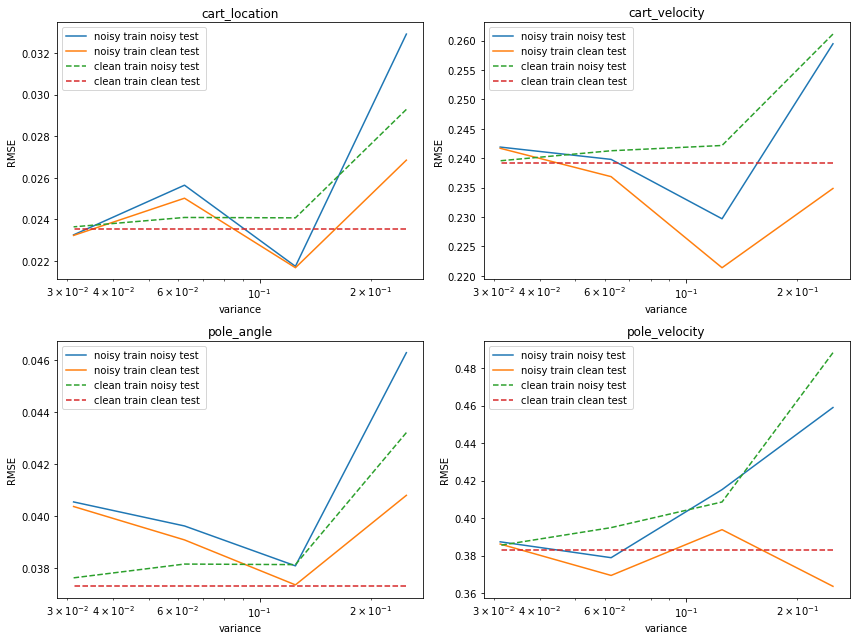

In [8]:
RMSE_noisy_train_noisy = None
RMSE_clean_train_noisy = None
RMSE_noisy_train_clean = None
RMSE_clean_train_clean = None
sigma = np.std(x_train, axis=0)
alpha_c, X_i_vals_c = train_alpha(x_train, y_train, no_RBC, sigma, n, train_proportion)
predictions_c_train_c = predict(x_test, alpha_c, X_i_vals_c, sigma)
RMSE_c_train_c = np.array(display_RMSE(predictions_c_train_c, y_test))


var_range = [0.5**i for i in range(2,6)]
for i,var_ in enumerate(var_range):
    
    x_train_n = add_noise(x_train,var=var_)
    x_test_n = add_noise(x_test,var=var_)
    
    sigma_n = np.std(x_train_n, axis=0)
    
    alpha_n, X_i_vals_n = train_alpha(x_train_n, y_train, no_RBC, sigma_n, n, train_proportion)
    
    predictions_n_train_n = predict(x_test_n, alpha_n, X_i_vals_n, sigma_n)
    predictions_c_train_n = predict(x_test, alpha_n, X_i_vals_n, sigma_n)
    predictions_n_train_c = predict(x_test_n, alpha_c, X_i_vals_c, sigma)
    

    RMSE_n_train_n = np.array(display_RMSE(predictions_n_train_n, y_test))
    RMSE_c_train_n = np.array(display_RMSE(predictions_c_train_n, y_test))
    RMSE_n_train_c = np.array(display_RMSE(predictions_n_train_c, y_test))
        
    try:
        RMSE_noisy_train_noisy = np.vstack((RMSE_noisy_train_noisy, RMSE_n_train_n))
        RMSE_clean_train_noisy = np.vstack((RMSE_clean_train_noisy, RMSE_c_train_n))
        RMSE_noisy_train_clean = np.vstack((RMSE_noisy_train_clean, RMSE_n_train_c))
        RMSE_clean_train_clean = np.vstack((RMSE_clean_train_clean, RMSE_c_train_c))


    except:
        RMSE_noisy_train_noisy = RMSE_n_train_n
        RMSE_clean_train_noisy = RMSE_c_train_n
        RMSE_noisy_train_clean = RMSE_n_train_c
        RMSE_clean_train_clean = RMSE_c_train_c
        
        
fig,axs = plt.subplots(2,2,figsize=(12,9))
       
for j in range(4):
    axs[int(round((j+1)/4,0)),j%2].plot(var_range, RMSE_noisy_train_noisy[:,j], label='noisy train noisy test')
    axs[int(round((j+1)/4,0)),j%2].plot(var_range, RMSE_clean_train_noisy[:,j], label='noisy train clean test')
    axs[int(round((j+1)/4,0)),j%2].plot(var_range, RMSE_noisy_train_clean[:,j], '--', label='clean train noisy test ')
    axs[int(round((j+1)/4,0)),j%2].plot(var_range, RMSE_clean_train_clean[:,j], '--', label='clean train clean test')
    axs[int(round((j+1)/4,0)),j%2].set_title(index_to_variable[j])
    axs[int(round((j+1)/4,0)),j%2].legend()
    axs[int(round((j+1)/4,0)),j%2].set_xlabel('variance')
    axs[int(round((j+1)/4,0)),j%2].set_ylabel('RMSE')
    axs[int(round((j+1)/4,0)),j%2].set_xscale('log')

fig.tight_layout()
# plt.savefig(plot_path + 'RMSE_non_linear_model_different_noise_levels_small_variance')

From these plots I chose a value of variance of 1.5e-1

### Control when trained on noisy data

In [9]:
linear_training_data = np.random.normal(0,0.2,(10,5))

In [10]:
p = scipy.optimize.minimize(training_loss, 
                        np.random.randint(0,1,4), 
                        args=(linear_training_data))['x']

TypeError: training_loss() missing 1 required positional argument: 'kwargs_'

particularly successful p values: array([-3.09912777,  0.52193813, 88.62515789, 10.11447602])

In [11]:
x_ = add_noise([0,0,0.1,0,0], var=1.5e-1)
x_history = [x_.copy()]
steps = 15

for step in range(steps):
    action_ = np.dot(p, x_[:-1])
    x_[-1] = action_
    x_ = np.array(move_cart(x_, steps=1, display_plots=False, remap_angle=False))  
    x_history.append(x_)
    
x_history = np.array(x_history)

fig, ax = plt.subplots(1, 1)

for i in [0,1,2,3]:
    ax.plot([i for i in range(steps+1)], [x[i] for x in x_history], label=index_to_variable[i])
ax.set_title('linear control stabilising pole initial_conditions: {}'.format(np.round(x_history[0][:-1],3)))
ax.legend()
fig.tight_layout()
# plt.savefig(plot_path + 'linear_policy_performance_trained_clean_test_noisy')

NameError: name 'p' is not defined

## Task 3.2
### Introduce noise to actual dynamics

move_cart function was edited to include the addition of noise to variables

In [12]:
np.array(move_cart(x_train[0], steps=1, display_plots=False, remap_angle=False, noisy_dynamics=True, noise_function=add_noise, var=1.5e-1))  

array([  1.61586458,   8.31679328,  -3.50049979, -12.22225546,
         0.15246704])

In [13]:
RMSE = None
var_range = [0.5**i for i in range(-2,5)]
for var_ in var_range:
    
    x_train_n = add_noise(x_train, var=1.5e-1)
    x_test_n = add_noise(x_test, var=1.5e-1)
    y_train_n = add_noise(y_train, var=var_)
    y_test_n = add_noise(y_test, var=var_)
    
    sigma_n = np.std(x_train_n, axis=0)
    alpha_n, X_i_vals_n = train_alpha(x_train_n, y_train_n, no_RBC, sigma_n, n, train_proportion)
    predictions_n = predict(x_test_n, alpha_n, X_i_vals_n, sigma_n)
    
    RMSE_ = np.array(display_RMSE(predictions_n, y_test_n))
        
    try:
        RMSE = np.vstack((RMSE, RMSE_))
    except:
        RMSE = RMSE_

C:\Users\Jordan\Anaconda3\lib\site-packages\autograd\tracer.py:48: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return f_raw(*args, **kwargs)


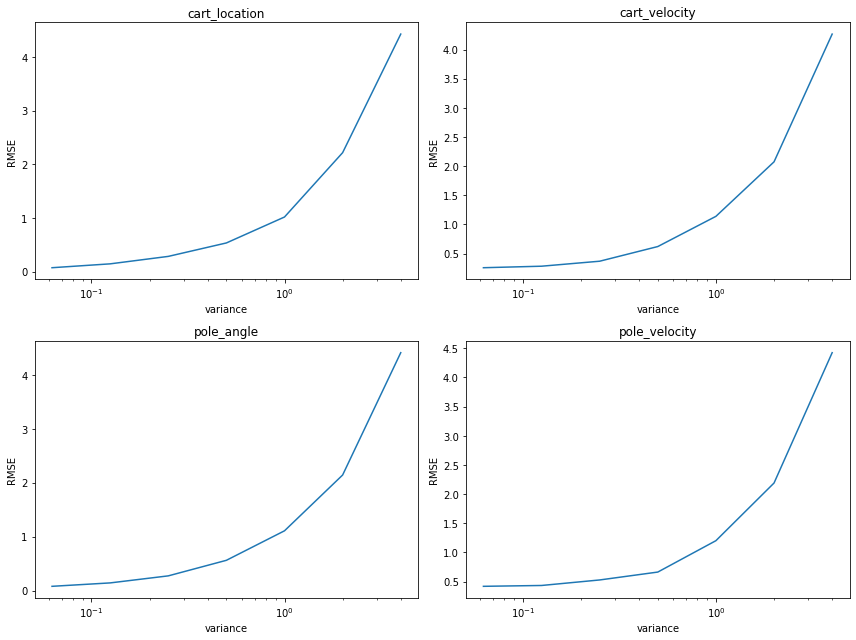

In [14]:
fig,axs = plt.subplots(2,2,figsize=(12,9))
       
for j in range(4):
    axs[int(round((j+1)/4,0)),j%2].plot(var_range, RMSE[:,j])
    axs[int(round((j+1)/4,0)),j%2].set_title(index_to_variable[j])
    axs[int(round((j+1)/4,0)),j%2].set_xlabel('variance')
    axs[int(round((j+1)/4,0)),j%2].set_ylabel('RMSE')
    axs[int(round((j+1)/4,0)),j%2].set_xscale('log')

fig.tight_layout()
# plt.savefig(plot_path + 'RMSE_different_noise_levels_in_y_values')

C:\Users\Jordan\Anaconda3\lib\site-packages\autograd\tracer.py:48: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return f_raw(*args, **kwargs)


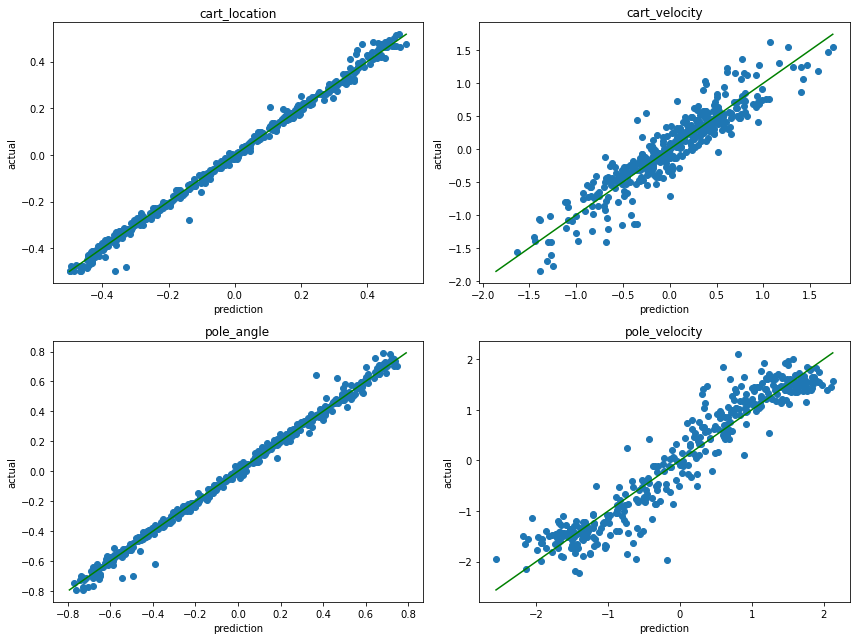

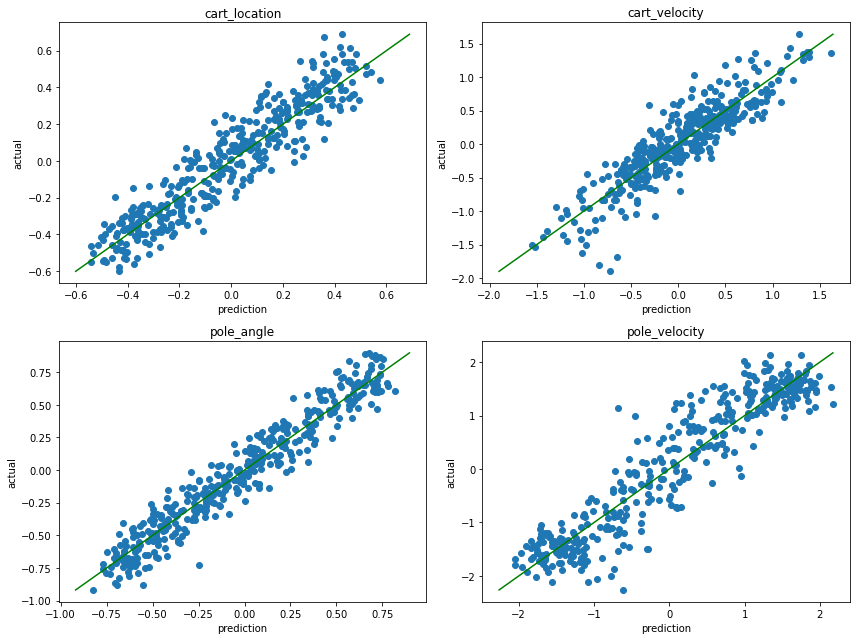

In [15]:
x_train_n = add_noise(x_train,var=1.5e-1)
x_test_n = add_noise(x_test,var=1.5e-1)
y_train_n = add_noise(y_train, var=1e-1)
y_test_n = add_noise(y_test, var=1e-1)
sigma_n = np.std(x_train_n, axis=0)
alpha_n, X_i_vals_n = train_alpha(x_train_n, y_train_n, no_RBC, sigma_n, n, train_proportion)
predictions_n = predict(x_test_n, alpha_n, X_i_vals_n, sigma_n)

plot_predictions_vs_actual(predictions, y_test, index_to_variable)
plt.show()
plot_predictions_vs_actual(predictions_n, y_test_n, index_to_variable)
# plt.savefig(plot_path + 'predictions_of_noisy_data')
plt.show()

clearly the non-linear model trained on noisy data tested on noisy data performs similarly to non-linear model trained on clean data tested on clean data

### Linear model performance with noisy x and y

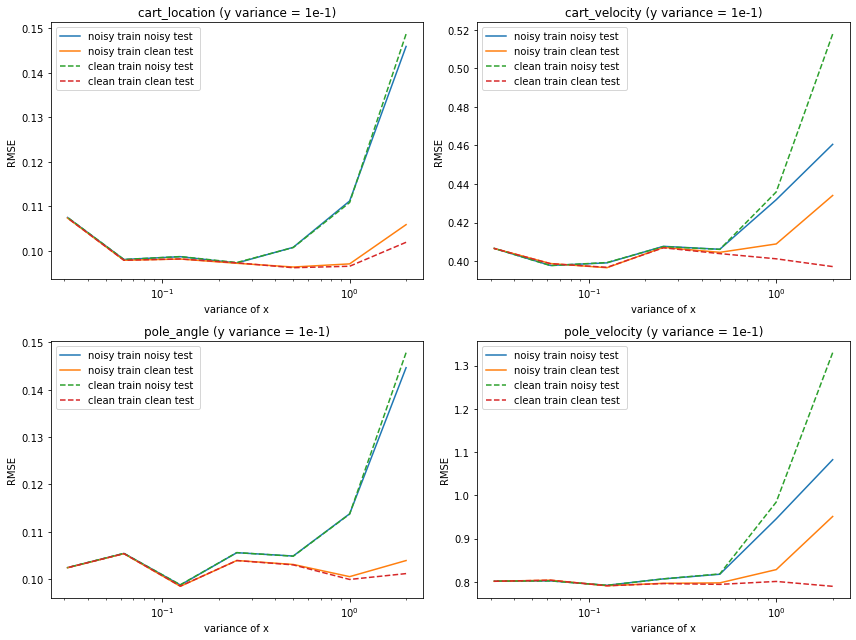

In [16]:
RMSE_noisy_train_noisy = None
RMSE_clean_train_noisy = None
RMSE_noisy_train_clean = None
RMSE_clean_train_clean = None

var_range = [0.5**i for i in range(-1,6)]
for var_ in var_range:
    reg_n = linear_model.LinearRegression()
    reg_c = linear_model.LinearRegression()

    x_train_n = add_noise(x_train,var=var_)
    x_test_n = add_noise(x_test,var=var_)
    y_train_n = add_noise(y_train,var=1e-1)
    y_test_n = add_noise(y_test,var=1e-1)
    
    reg_n.fit(x_train_n, y_train_n)
    reg_c.fit(x_train, y_train_n)
    
    predictions_n_train_n = reg_n.predict(x_test_n)
    predictions_c_train_n = reg_n.predict(x_test)
    predictions_n_train_c = reg_c.predict(x_test_n)
    predictions_c_train_c = reg_c.predict(x_test)

    RMSE_n_train_n = np.array(display_RMSE(predictions_n_train_n, y_test_n))
    RMSE_c_train_n = np.array(display_RMSE(predictions_c_train_n, y_test_n))
    RMSE_n_train_c = np.array(display_RMSE(predictions_n_train_c, y_test_n))
    RMSE_c_train_c = np.array(display_RMSE(predictions_c_train_c, y_test_n))
        
    try:
        RMSE_noisy_train_noisy = np.vstack((RMSE_noisy_train_noisy, RMSE_n_train_n))
        RMSE_clean_train_noisy = np.vstack((RMSE_clean_train_noisy, RMSE_c_train_n))
        RMSE_noisy_train_clean = np.vstack((RMSE_noisy_train_clean, RMSE_n_train_c))
        RMSE_clean_train_clean = np.vstack((RMSE_clean_train_clean, RMSE_c_train_c))


    except:
        RMSE_noisy_train_noisy = RMSE_n_train_n
        RMSE_clean_train_noisy = RMSE_c_train_n
        RMSE_noisy_train_clean = RMSE_n_train_c
        RMSE_clean_train_clean = RMSE_c_train_c
        
        
fig,axs = plt.subplots(2,2,figsize=(12,9))
       
for j in range(4):
    axs[int(round((j+1)/4,0)),j%2].plot(var_range, RMSE_noisy_train_noisy[:,j], label='noisy train noisy test')
    axs[int(round((j+1)/4,0)),j%2].plot(var_range, RMSE_clean_train_noisy[:,j], label='noisy train clean test')
    axs[int(round((j+1)/4,0)),j%2].plot(var_range, RMSE_noisy_train_clean[:,j], '--', label='clean train noisy test ')
    axs[int(round((j+1)/4,0)),j%2].plot(var_range, RMSE_clean_train_clean[:,j], '--', label='clean train clean test')
    axs[int(round((j+1)/4,0)),j%2].set_title(index_to_variable[j]+' (y variance = 1e-1)')
    axs[int(round((j+1)/4,0)),j%2].legend()
    axs[int(round((j+1)/4,0)),j%2].set_xlabel('variance of x')
    axs[int(round((j+1)/4,0)),j%2].set_ylabel('RMSE')
    axs[int(round((j+1)/4,0)),j%2].set_xscale('log')

fig.tight_layout()
# plt.savefig(plot_path + 'RMSE_linear_model_different_noise_levels_x_and_y')

### Non-linear model performance with noisy x and y

C:\Users\Jordan\Anaconda3\lib\site-packages\autograd\tracer.py:48: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return f_raw(*args, **kwargs)


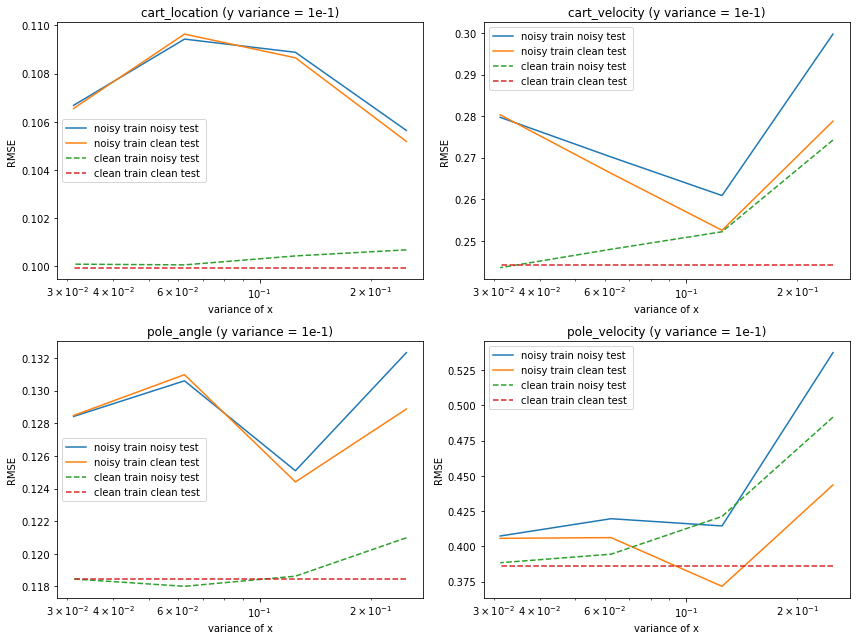

In [17]:
RMSE_noisy_train_noisy = None
RMSE_clean_train_noisy = None
RMSE_noisy_train_clean = None
RMSE_clean_train_clean = None
sigma = np.std(x_train, axis=0)
y_train_n = add_noise(y_train,var=1e-1)
y_test_n = add_noise(y_test,var=1e-1)
alpha_c, X_i_vals_c = train_alpha(x_train, y_train, no_RBC, sigma, n, train_proportion)
predictions_c_train_c = predict(x_test, alpha_c, X_i_vals_c, sigma)
RMSE_c_train_c = np.array(display_RMSE(predictions_c_train_c, y_test_n))


var_range = [0.5**i for i in range(2,6)]
for i,var_ in enumerate(var_range):
    
    x_train_n = add_noise(x_train,var=var_)
    x_test_n = add_noise(x_test,var=var_)
    
    
    sigma_n = np.std(x_train_n, axis=0)
    
    alpha_n, X_i_vals_n = train_alpha(x_train_n, y_train_n, no_RBC, sigma_n, n, train_proportion)
    
    predictions_n_train_n = predict(x_test_n, alpha_n, X_i_vals_n, sigma_n)
    predictions_c_train_n = predict(x_test, alpha_n, X_i_vals_n, sigma_n)
    predictions_n_train_c = predict(x_test_n, alpha_c, X_i_vals_c, sigma)
    

    RMSE_n_train_n = np.array(display_RMSE(predictions_n_train_n, y_test_n))
    RMSE_c_train_n = np.array(display_RMSE(predictions_c_train_n, y_test_n))
    RMSE_n_train_c = np.array(display_RMSE(predictions_n_train_c, y_test_n))
        
    try:
        RMSE_noisy_train_noisy = np.vstack((RMSE_noisy_train_noisy, RMSE_n_train_n))
        RMSE_clean_train_noisy = np.vstack((RMSE_clean_train_noisy, RMSE_c_train_n))
        RMSE_noisy_train_clean = np.vstack((RMSE_noisy_train_clean, RMSE_n_train_c))
        RMSE_clean_train_clean = np.vstack((RMSE_clean_train_clean, RMSE_c_train_c))


    except:
        RMSE_noisy_train_noisy = RMSE_n_train_n
        RMSE_clean_train_noisy = RMSE_c_train_n
        RMSE_noisy_train_clean = RMSE_n_train_c
        RMSE_clean_train_clean = RMSE_c_train_c
        
        
fig,axs = plt.subplots(2,2,figsize=(12,9))
       
for j in range(4):
    axs[int(round((j+1)/4,0)),j%2].plot(var_range, RMSE_noisy_train_noisy[:,j], label='noisy train noisy test')
    axs[int(round((j+1)/4,0)),j%2].plot(var_range, RMSE_clean_train_noisy[:,j], label='noisy train clean test')
    axs[int(round((j+1)/4,0)),j%2].plot(var_range, RMSE_noisy_train_clean[:,j], '--', label='clean train noisy test ')
    axs[int(round((j+1)/4,0)),j%2].plot(var_range, RMSE_clean_train_clean[:,j], '--', label='clean train clean test')
    axs[int(round((j+1)/4,0)),j%2].set_title(index_to_variable[j]+' (y variance = 1e-1)')
    axs[int(round((j+1)/4,0)),j%2].legend()
    axs[int(round((j+1)/4,0)),j%2].set_xlabel('variance of x')
    axs[int(round((j+1)/4,0)),j%2].set_ylabel('RMSE')
    axs[int(round((j+1)/4,0)),j%2].set_xscale('log')

fig.tight_layout()
# plt.savefig(plot_path + 'RMSE_non_linear_model_different_noise_levels_small_variance_x_and_y')